In [93]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


import missingno as msno

# ml 
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz
from   sklearn.ensemble        import RandomForestClassifier
from   sklearn.linear_model    import LogisticRegression , Ridge , RidgeClassifier


from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , RocCurveDisplay , roc_auc_score
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler , Binarizer
from   sklearn.impute          import SimpleImputer
from   sklearn.base            import BaseEstimator 

from   IPython.display import Image


sklearn.__version__

'1.1.1'

In [171]:
# 데이터 전처리 후 불러오기 

In [172]:
train01 = pd.read_excel('rail_01.xlsx')
trian02 = pd.read_excel('rail_02.xlsx')

In [173]:
# 데이터 타겟 값과 특성값으로 분리 

In [174]:
train01 = train01.drop(train01.columns[0] , axis=1)

In [175]:
rail01 = train01.iloc[:, 0:5]
rail01.describe()


,RN400-T2EX-CH2\n(남북방향),기온\n(°C),풍속\n(m/s),강수량\n(mm),습도\n(%)
count,2846.000000,2845.000000,2840.000000,2821.000000,2845.000000
mean,22.189055,17.679016,1.845317,0.096065,66.676907
std,13.349178,7.588798,1.175075,0.695468,22.134162
min,-4.690000,-1.800000,0.000000,0.000000,16.100000
25%,12.200000,12.200000,1.000000,0.000000,50.700000
50%,21.115000,18.100000,1.500000,0.000000,67.700000
75%,31.557500,23.700000,2.500000,0.000000,83.500000
max,57.490000,34.400000,7.200000,16.500000,99.900000


In [176]:
rail01.head()

,RN400-T2EX-CH2\n(남북방향),기온\n(°C),풍속\n(m/s),강수량\n(mm),습도\n(%)
0,2.26,4.5,3.9,0.0,98.0
1,1.41,3.8,1.8,0.0,99.7
2,0.28,2.7,0.6,0.0,99.7
3,-0.42,3.0,0.5,0.0,99.7
4,-0.80,3.6,1.2,0.0,97.5


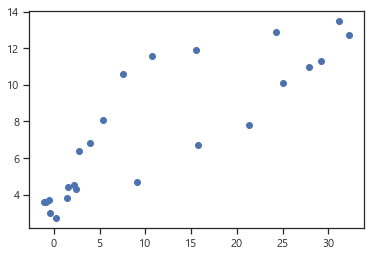

In [177]:
rail_temp = rail01.iloc[0:24, 0] 
temp = rail01.iloc[0:24, 1]

plt.scatter(rail_temp, temp)
plt.show()

In [178]:
# 데이터 결측값 처리 
rail01.isnull().sum()

RN400-T2EX-CH2\n(남북방향)     0
기온\n(°C)                   1
풍속\n(m/s)                  6
강수량\n(mm)                 25
습도\n(%)                    1
dtype: int64

In [179]:
# 결측값 삭제
rail01 = rail01.dropna(axis=0)
rail01
rail01.isnull().sum()

RN400-T2EX-CH2\n(남북방향)    0
기온\n(°C)                  0
풍속\n(m/s)                 0
강수량\n(mm)                 0
습도\n(%)                   0
dtype: int64

In [180]:
rail01_featuer = rail01.iloc[:, 1:5]
rail01_target = rail01.iloc[:, 0]

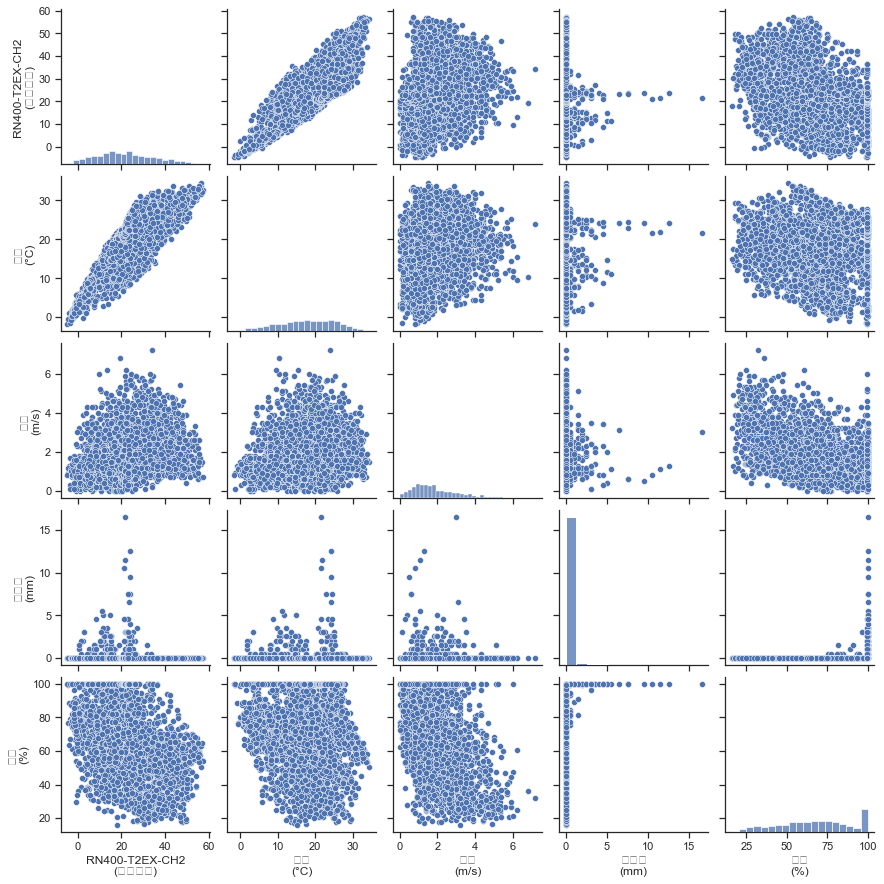

In [181]:
import seaborn as sns
sns.set_theme(style="ticks")

df = rail01
sns.pairplot(df)

In [185]:
print('데이터 클린징 없이 모델의 성능 예측 - ') 
X_train , X_test , y_train , y_test = train_test_split(rail01_featuer , 
                                                       rail01_target , 
                                                       test_size = 0.05 , 
                                                       )

X_train.shape , X_test.shape , y_train.shape , y_test.shape 

데이터 클린징 없이 모델의 성능 예측 - 


((2674, 4), (141, 4), (2674,), (141,))

In [217]:
# 표준화 StandScale 

lr = LinearRegression()
lr.fit(X_train , y_train)


lr.predict([[33 , 2 , 0 , 40]])







array([47.56546377])